# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# 設定 data_path
dir_data = '../data/HomeCredit'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64


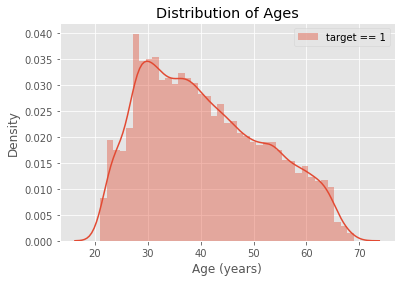

In [8]:
#呈現歲數的bar 與 Kde 
print((app_train['DAYS_BIRTH']/365).describe())

plt.style.use('ggplot') 
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(20, 25]    12159
(65, 70]     8103
Name: YEARS_BINNED, dtype: int64


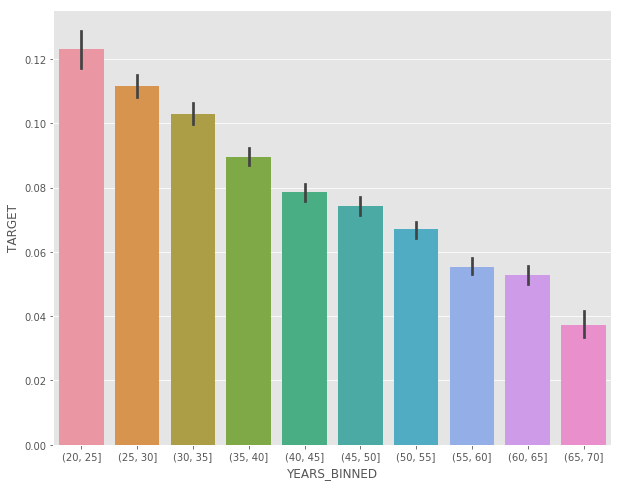

In [43]:
#呈現歲數分組後的欠債機率的bar
bins = np.arange(20,75,5)
app_train['YEARS_BINNED'] = pd.cut(app_train['DAYS_BIRTH']/365,bins)
print(app_train['YEARS_BINNED'].value_counts())

plt.style.use('ggplot') 
plt.figure(figsize = (10, 8))
sns.barplot( x = 'YEARS_BINNED', y = 'TARGET', data = app_train)

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

count    307511.000000
mean          6.168784
std           5.852585
min          -0.000000
25%           2.556164
50%           4.515068
75%           7.561644
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64


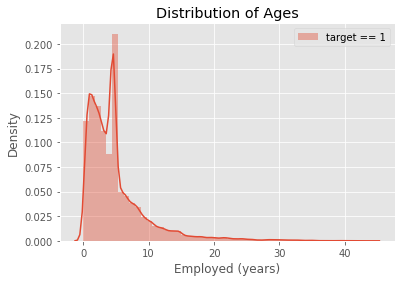

In [60]:
app_train['DAYS_EMPLOYED'].fillna(app_train['DAYS_EMPLOYED'].median(),inplace = True)
app_train['YEARS_EMPLOYED'] = app_train['DAYS_EMPLOYED']/(-365)
print(app_train['YEARS_EMPLOYED'].describe())

sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'YEARS_EMPLOYED'] , label = 'target == 1')
plt.legend()
plt.xlabel('Employed (years)'); plt.ylabel('Density'); plt.title('Distribution of years');
plt.show()

(-0.001, 2.052]    61569
(4.375, 4.644]     61550
(8.852, 49.074]    61489
(4.644, 8.852]     61463
(2.052, 4.375]     61440
Name: years_employed_cut, dtype: int64


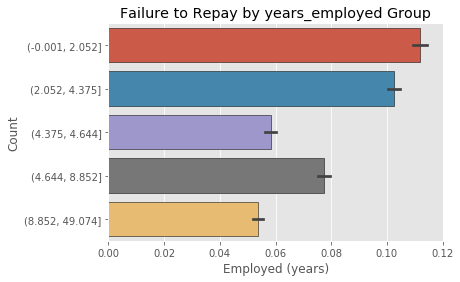

In [86]:
app_train['years_employed_cut'] = pd.qcut(app_train['YEARS_EMPLOYED'],5)
print(app_train['years_employed_cut'] .value_counts())


plt.style.use('ggplot') # 改變繪圖樣式 (style)
sns.barplot( x = 'TARGET', y = 'years_employed_cut',edgecolor = 'k', data = app_train)
plt.title('Failure to Repay by years_employed Group'); plt.xlabel('Employed (years)'); plt.ylabel('Count');
plt.show()
